In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

In [2]:
!git clone "https://github.com/HarshvardhanSingh-13/Datasets"

Cloning into 'Datasets'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 335 (delta 22), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (335/335), 302.68 MiB | 18.48 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Updating files: 100% (243/243), done.


In [3]:
netflix_df = pd.read_csv('/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [6]:
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [7]:
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [8]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

In [9]:
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [10]:
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


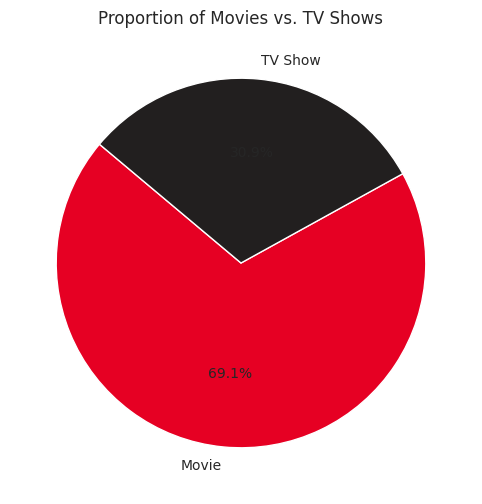

In [11]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

<Figure size 1400x800 with 0 Axes>

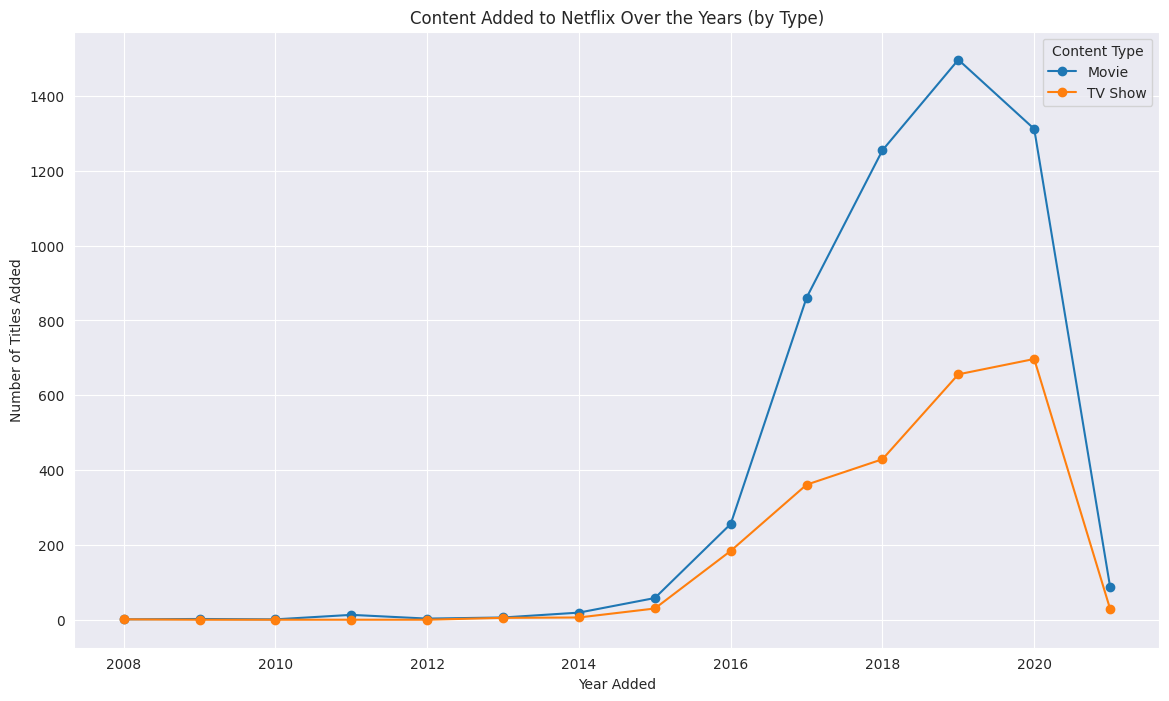

In [12]:
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [13]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [14]:
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

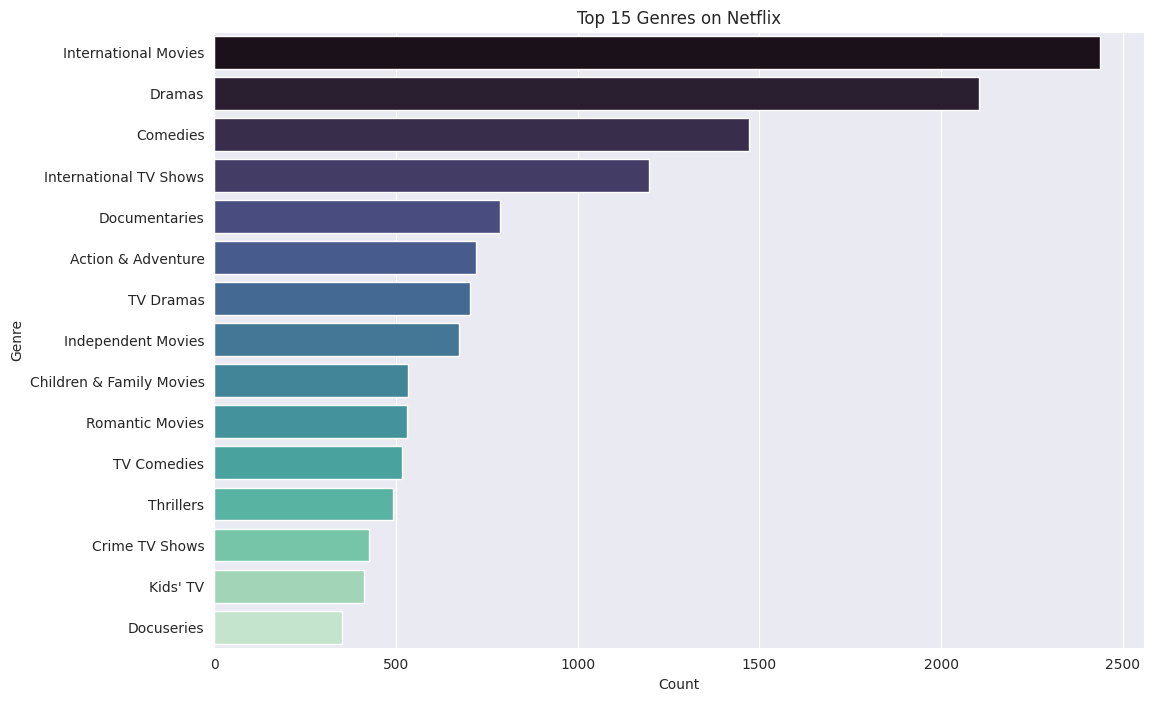

In [15]:
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count']

top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [16]:
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [17]:
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

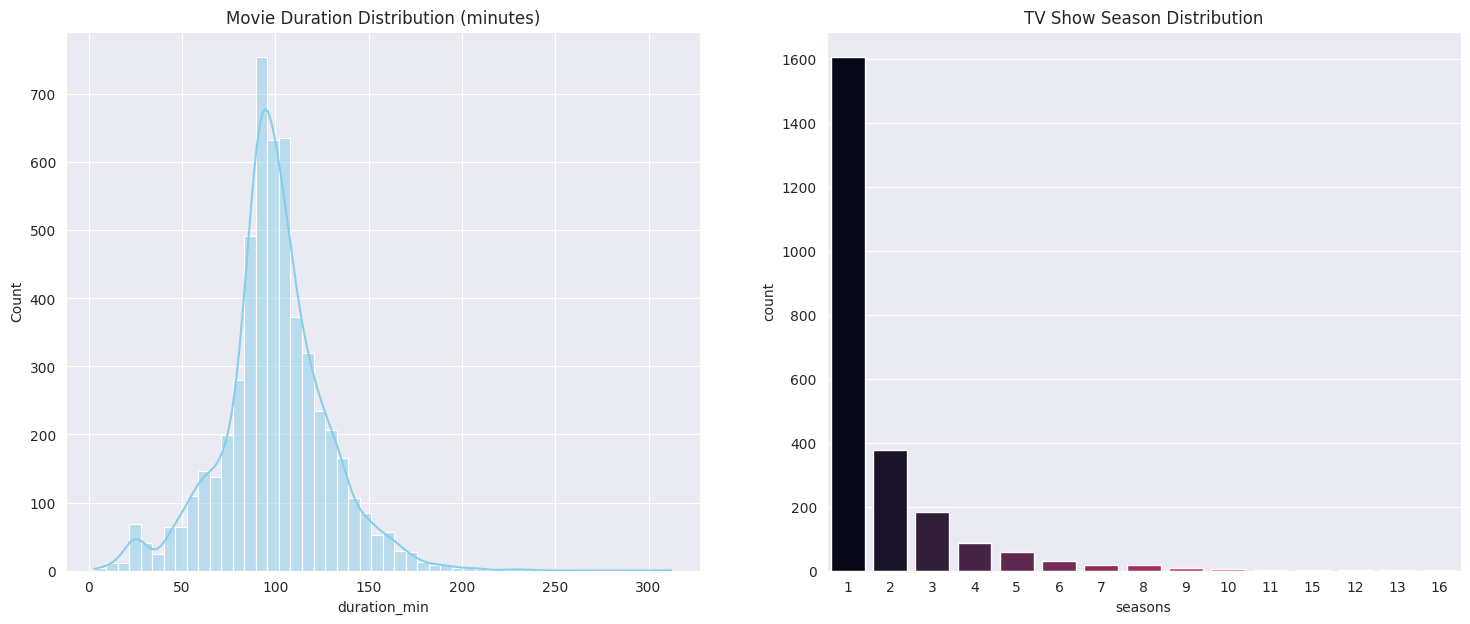

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

In [19]:
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [20]:
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count']

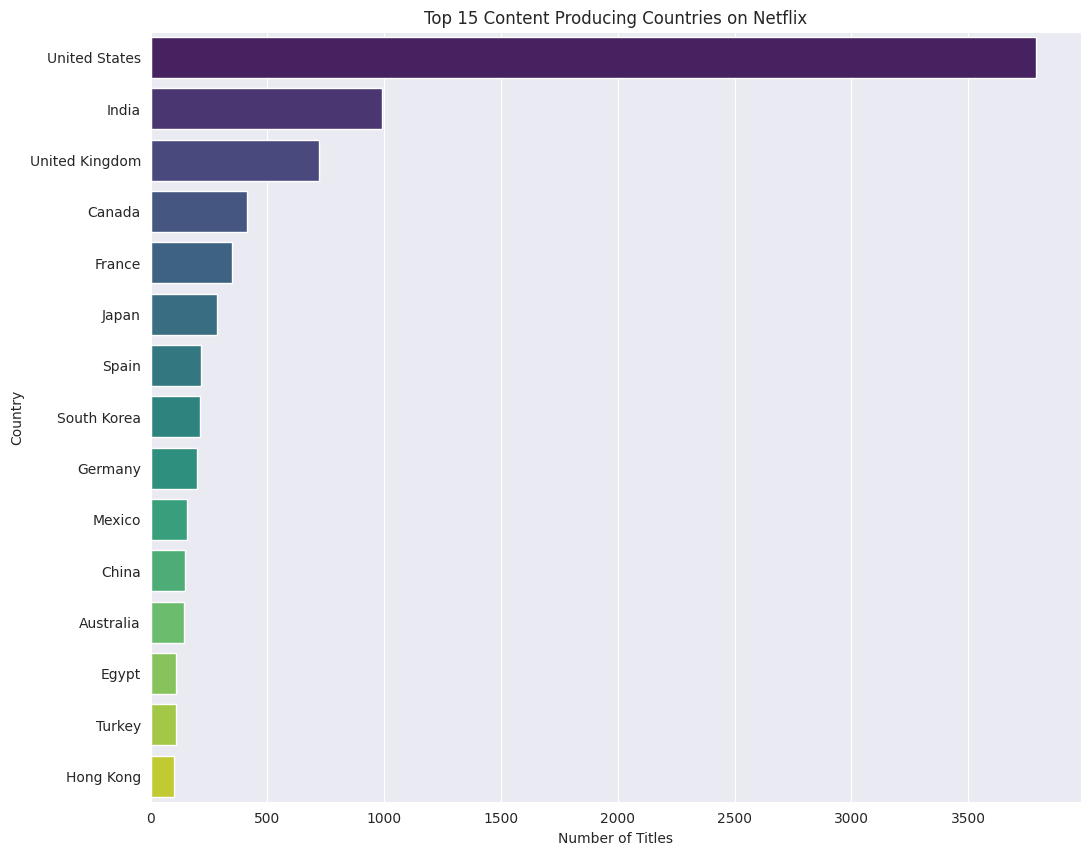

In [21]:
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [22]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


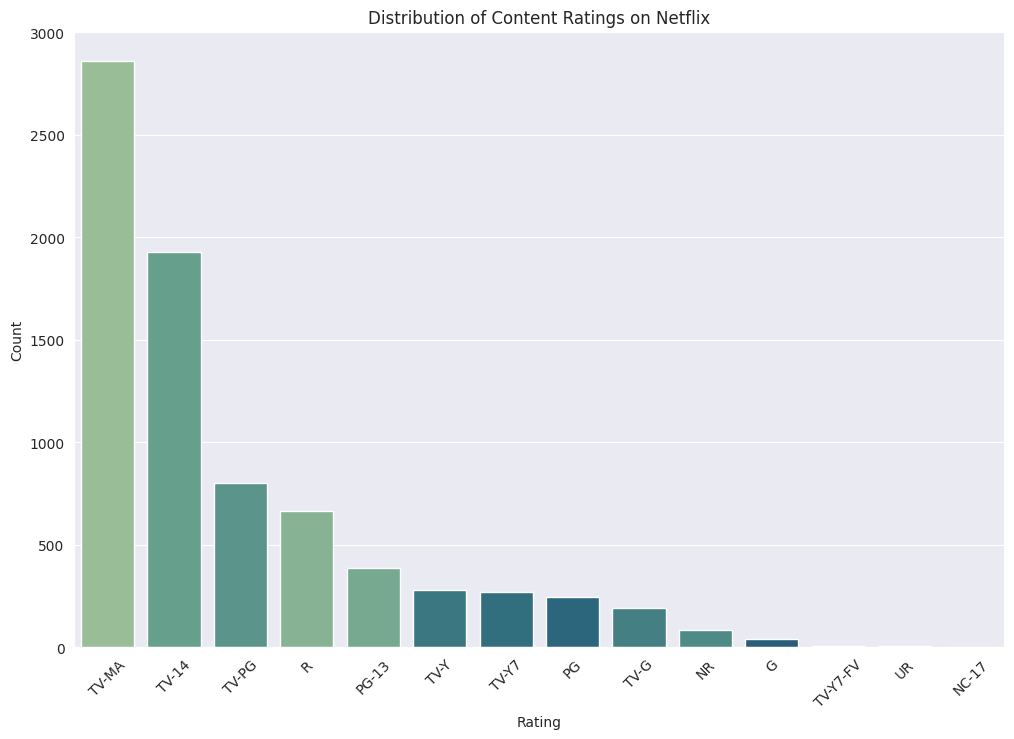

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

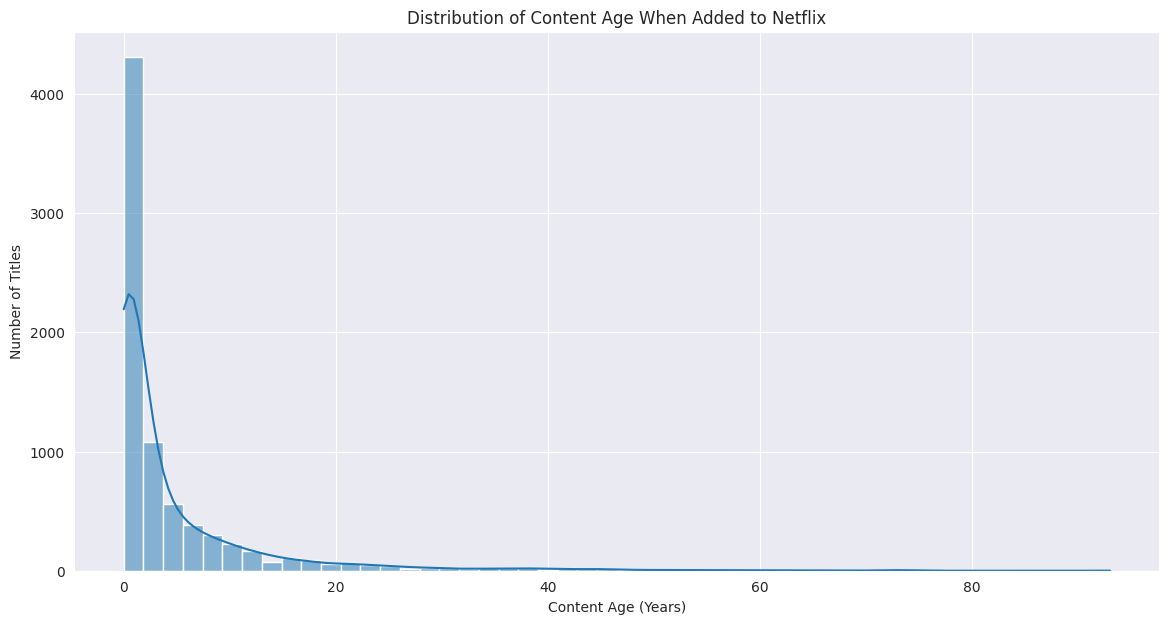

In [24]:
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

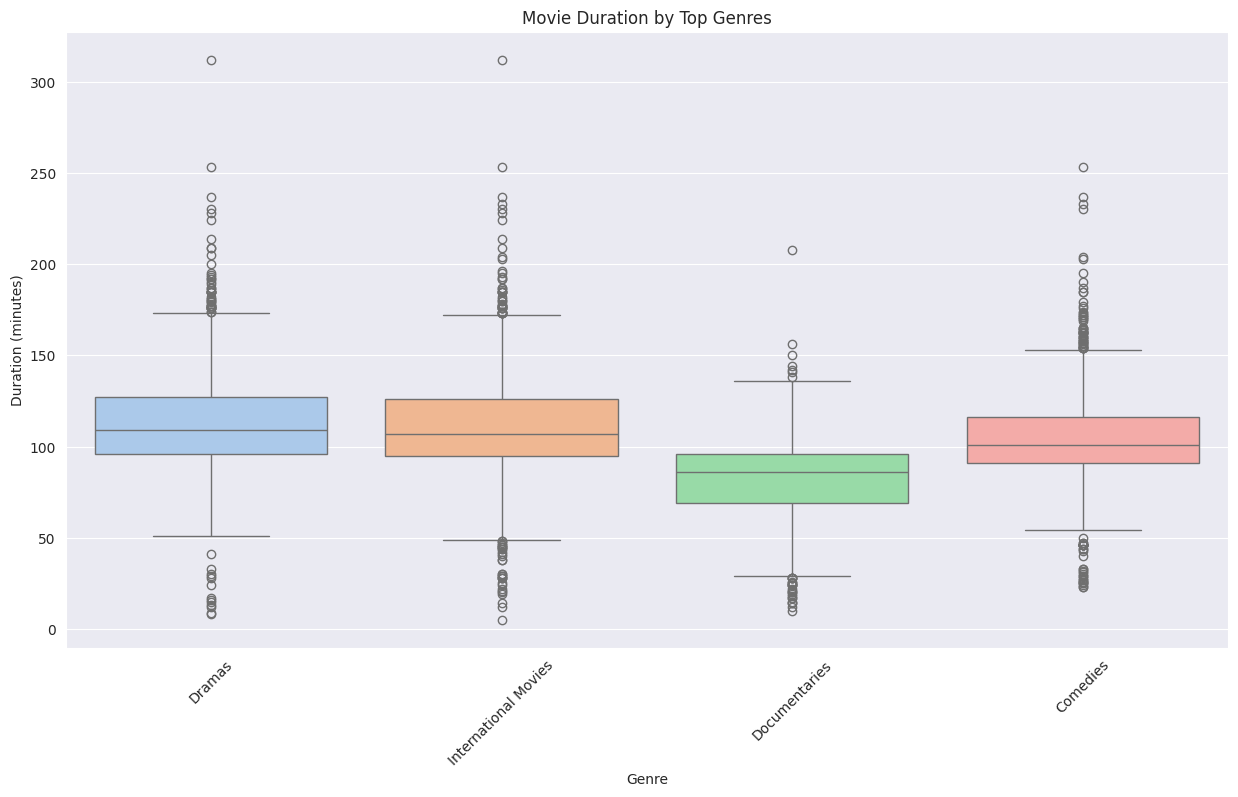

In [25]:
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

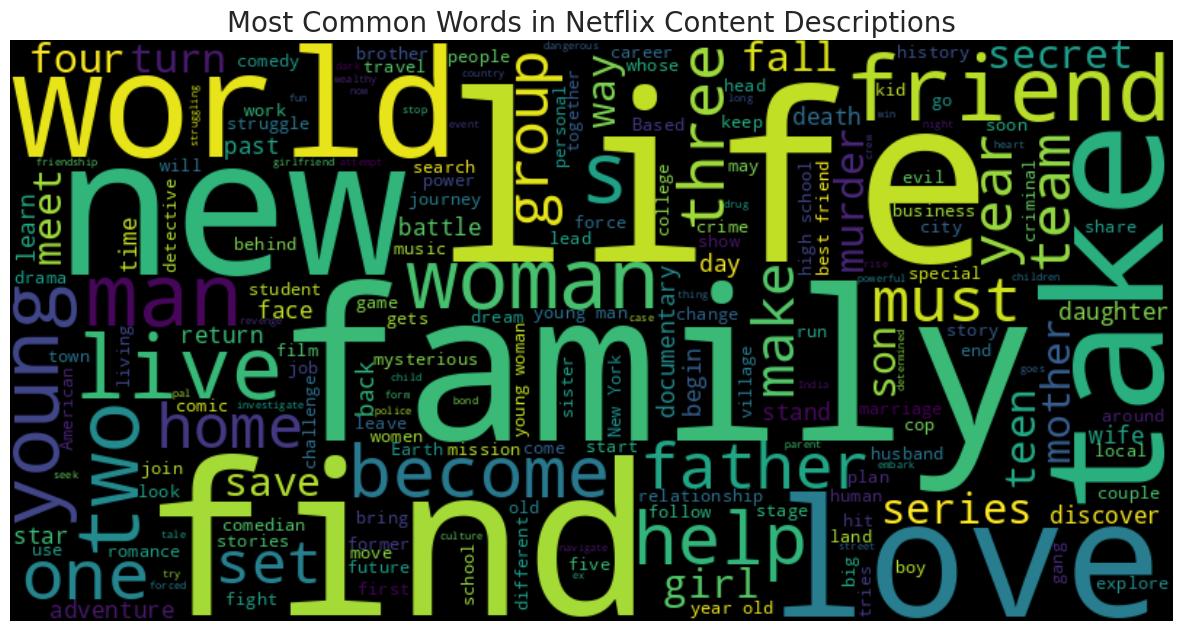

In [26]:
text = ' '.join(netflix_df['description'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

In [36]:
#Q1-How has the distribution of content ratings changed over time?
# --- Ensure year_added exists ---
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Keep only rows with valid year_added and rating
df_rt = netflix_df.dropna(subset=['year_added', 'rating']).copy()
df_rt['year_added'] = df_rt['year_added'].astype(int)

# --- 1) Counts of ratings per year ---
rating_counts_by_year = (
    df_rt.groupby(['year_added', 'rating'])
         .size()
         .unstack(fill_value=0)
         .sort_index()
)

rating_counts_by_year.head()


rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
year_added,,,,,,,,,,,,,,
2008,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,5,0,3,5,0,0,0,0
2012,0,0,0,1,0,1,0,0,0,1,0,0,0,0


In [37]:
# --- Ensure year_added exists ---
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Keep only rows with valid year_added and rating
df_rt = netflix_df.dropna(subset=['year_added', 'rating']).copy()
df_rt['year_added'] = df_rt['year_added'].astype(int)

# --- 1) Counts of ratings per year ---
rating_counts_by_year = (
    df_rt.groupby(['year_added', 'rating'])
         .size()
         .unstack(fill_value=0)
         .sort_index()
)

rating_counts_by_year.head()


rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
year_added,,,,,,,,,,,,,,
2008,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,5,0,3,5,0,0,0,0
2012,0,0,0,1,0,1,0,0,0,1,0,0,0,0


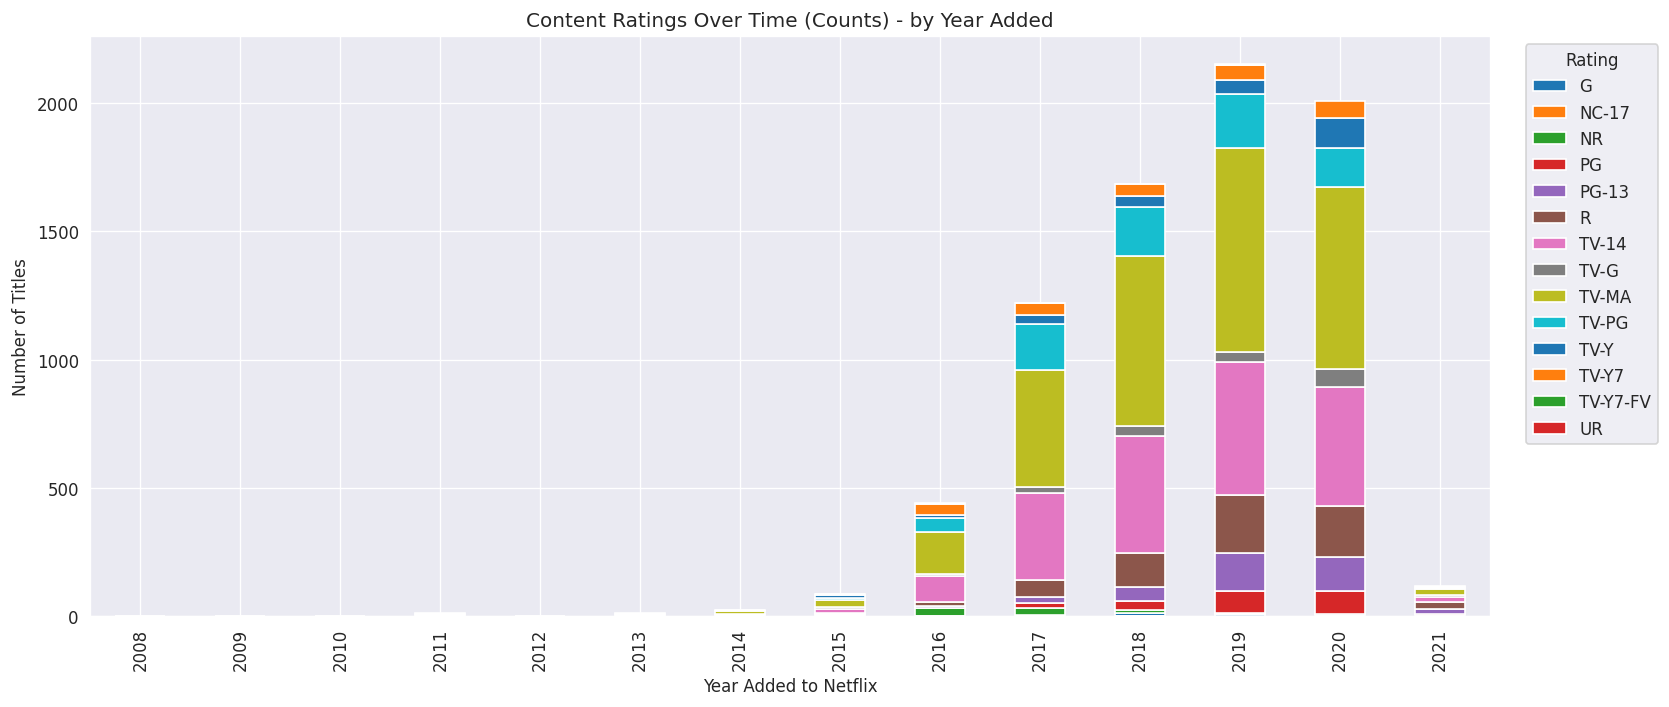

In [38]:
rating_counts_by_year.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Content Ratings Over Time (Counts) - by Year Added")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles")
plt.legend(title="Rating", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


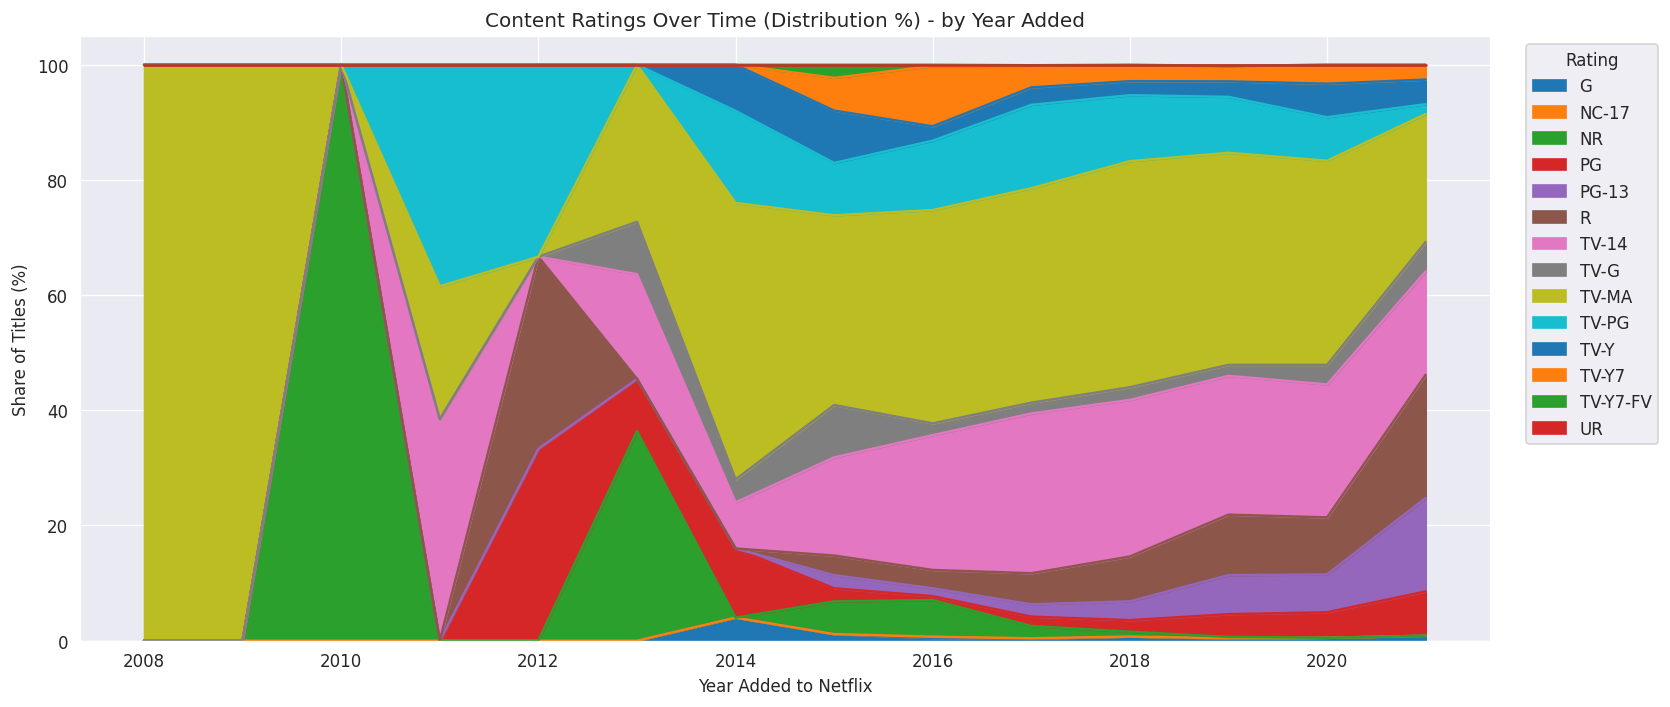

In [39]:
rating_share_by_year = rating_counts_by_year.div(rating_counts_by_year.sum(axis=1), axis=0) * 100

rating_share_by_year.plot(kind='area', stacked=True, figsize=(14,6))
plt.title("Content Ratings Over Time (Distribution %) - by Year Added")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Share of Titles (%)")
plt.legend(title="Rating", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


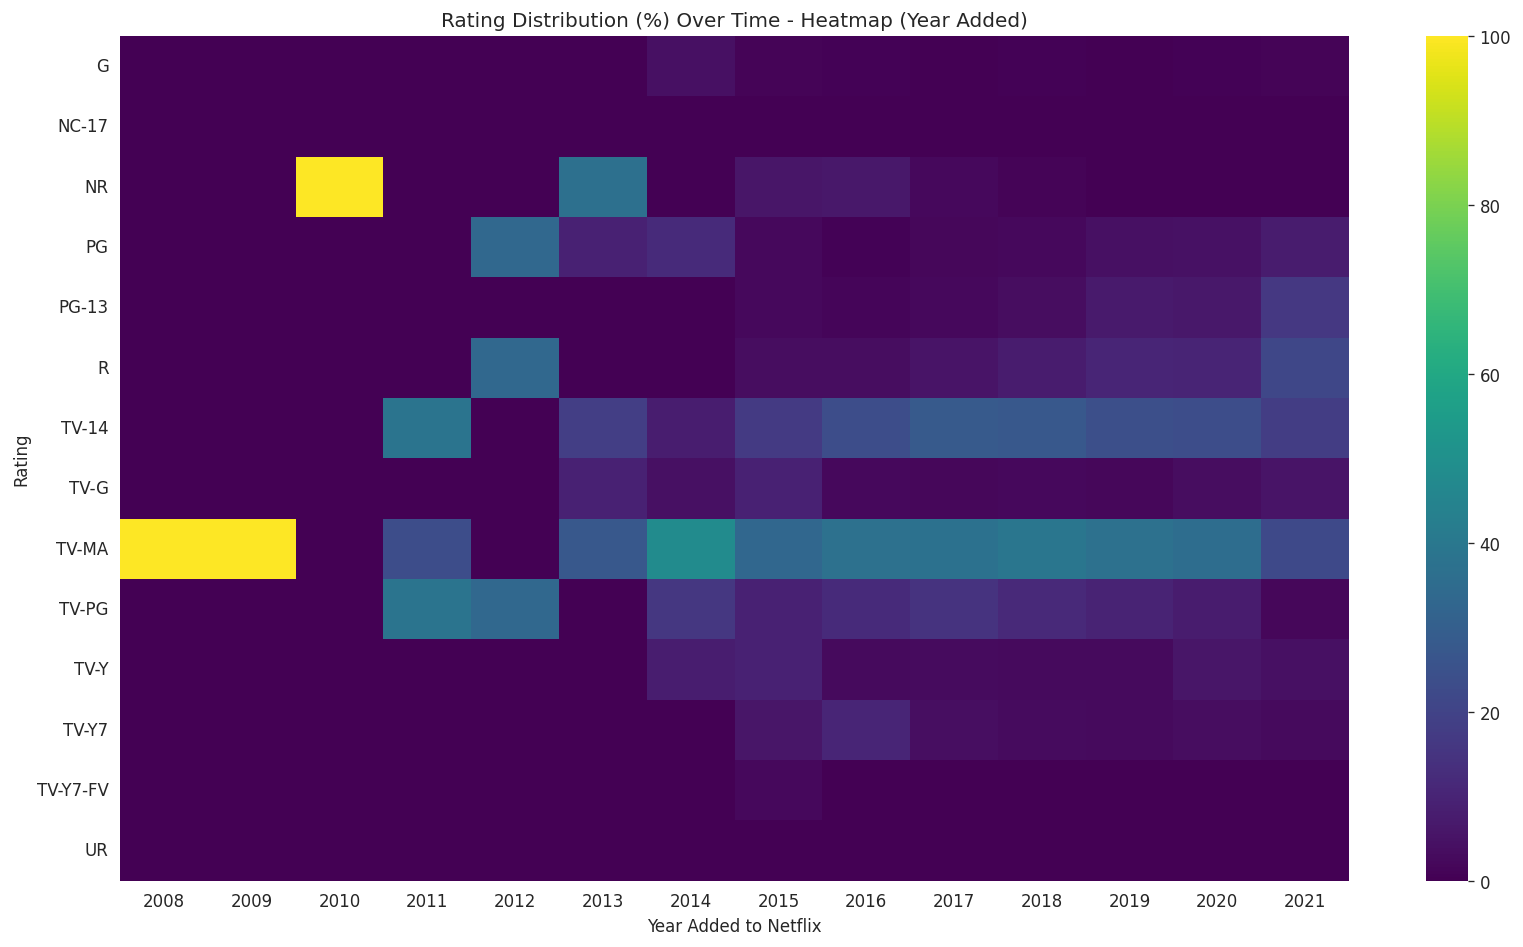

In [40]:
plt.figure(figsize=(14,8))
sns.heatmap(rating_share_by_year.T, cmap="viridis")
plt.title("Rating Distribution (%) Over Time - Heatmap (Year Added)")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


         count       mean  median       std  min  max
type                                                 
Movie     5372  12.081720     9.0  9.667293    4   83
TV Show   2398   8.786072     7.0  5.660587    4  100


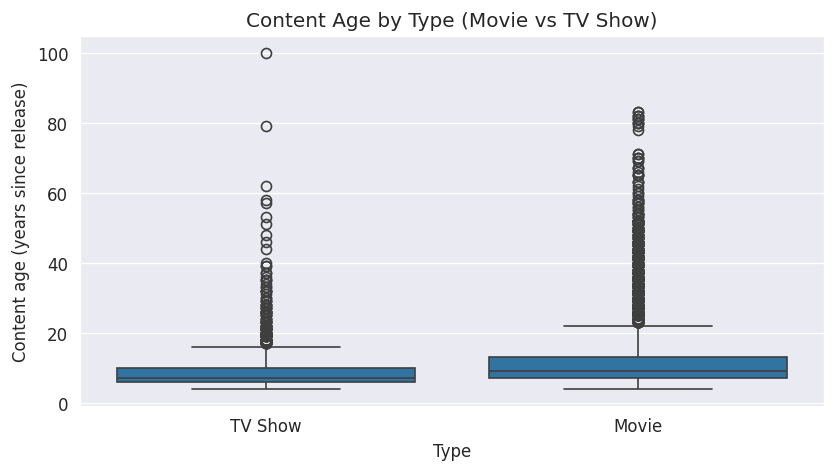

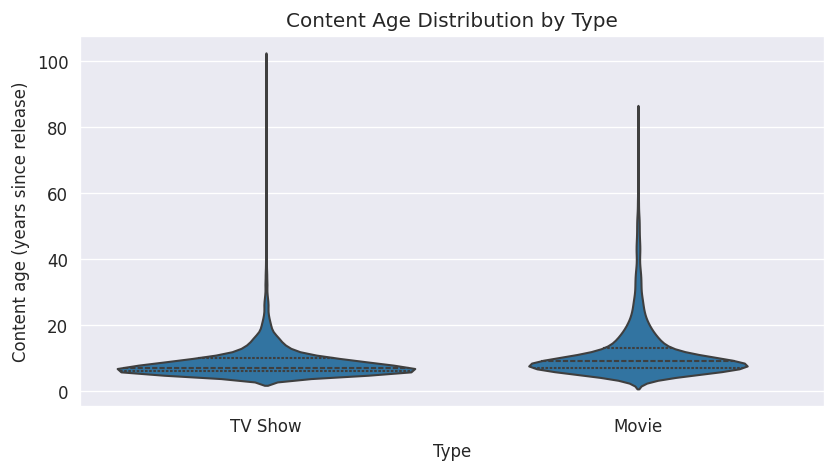

Mann–Whitney U test p-value = 0.000000
Cliff's delta = 0.28284731878203295


In [41]:
#Q2 - Is there a relationship between content age and its type (Movie vs. TV Show)?
# --- Relationship between content age and type (Movie vs TV Show) ---

import scipy.stats as stats

# 1) Define content age (years since release)
current_year = pd.Timestamp.today().year
netflix_df['content_age'] = current_year - netflix_df['release_year']

# Basic summary by type
summary = (netflix_df
           .groupby('type')['content_age']
           .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
           .sort_index())
print(summary)

# 2) Visual comparison (distribution)
plt.figure(figsize=(8,4))
sns.boxplot(x='type', y='content_age', data=netflix_df)
plt.title("Content Age by Type (Movie vs TV Show)")
plt.xlabel("Type")
plt.ylabel("Content age (years since release)")
plt.show()

plt.figure(figsize=(8,4))
sns.violinplot(x='type', y='content_age', data=netflix_df, inner='quartile')
plt.title("Content Age Distribution by Type")
plt.xlabel("Type")
plt.ylabel("Content age (years since release)")
plt.show()

# 3) Statistical test (robust to non-normal distributions)
movie_age = netflix_df.loc[netflix_df['type'] == 'Movie', 'content_age'].dropna()
tv_age    = netflix_df.loc[netflix_df['type'] == 'TV Show', 'content_age'].dropna()

u_stat, p_val = stats.mannwhitneyu(movie_age, tv_age, alternative='two-sided')
print(f"Mann–Whitney U test p-value = {p_val:.6f}")

# (Optional) Effect size (Cliff's delta)
def cliffs_delta(x, y):
    x = np.asarray(x); y = np.asarray(y)
    return (np.sum(x[:, None] > y) - np.sum(x[:, None] < y)) / (len(x)*len(y))

print("Cliff's delta =", cliffs_delta(movie_age, tv_age))


In [42]:
#Q3 - Can we identify any trends in content production based on the release year vs. the year added to Netflix?
# Ensure date_added is datetime (you already have this, keep it)
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Year added
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Delay between release year and Netflix-added year
netflix_df['years_to_add'] = netflix_df['year_added'] - netflix_df['release_year']

# Quick sanity check
netflix_df[['title','release_year','year_added','years_to_add']].dropna().head()


,title,release_year,year_added,years_to_add
0,3%,2020,2020,0
1,7:19,2016,2016,0
2,23:59,2011,2018,7
3,9,2009,2017,8
4,21,2008,2020,12


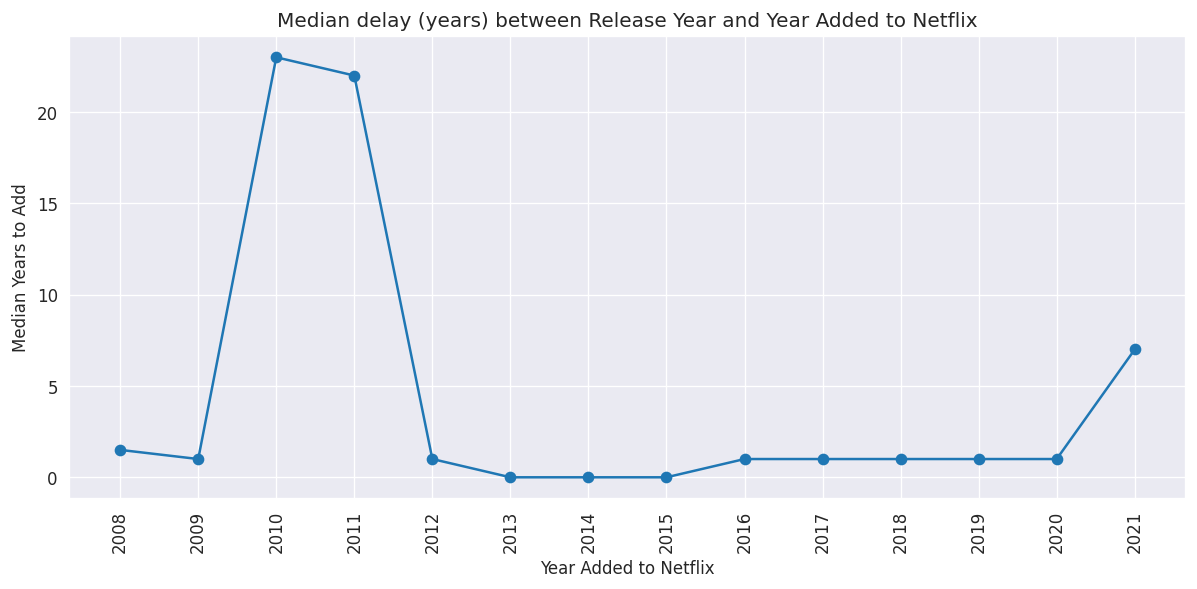

,year_added,count,mean,median
4,2012,3,1.000000,1.0
5,2013,11,0.545455,0.0
6,2014,25,3.560000,0.0
7,2015,88,1.272727,0.0
8,2016,440,2.997727,1.0
9,2017,1222,4.028642,1.0
10,2018,1684,4.118765,1.0
11,2019,2153,5.250813,1.0
12,2020,2009,4.642608,1.0
13,2021,117,9.581197,7.0


In [43]:
lag_by_added_year = (netflix_df
                     .dropna(subset=['year_added','release_year','years_to_add'])
                     .groupby('year_added')['years_to_add']
                     .agg(['count','mean','median'])
                     .reset_index())

plt.figure(figsize=(12,5))
plt.plot(lag_by_added_year['year_added'], lag_by_added_year['median'], marker='o')
plt.title("Median delay (years) between Release Year and Year Added to Netflix")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Median Years to Add")
plt.xticks(lag_by_added_year['year_added'].astype(int), rotation=90)
plt.show()

lag_by_added_year.tail(10)


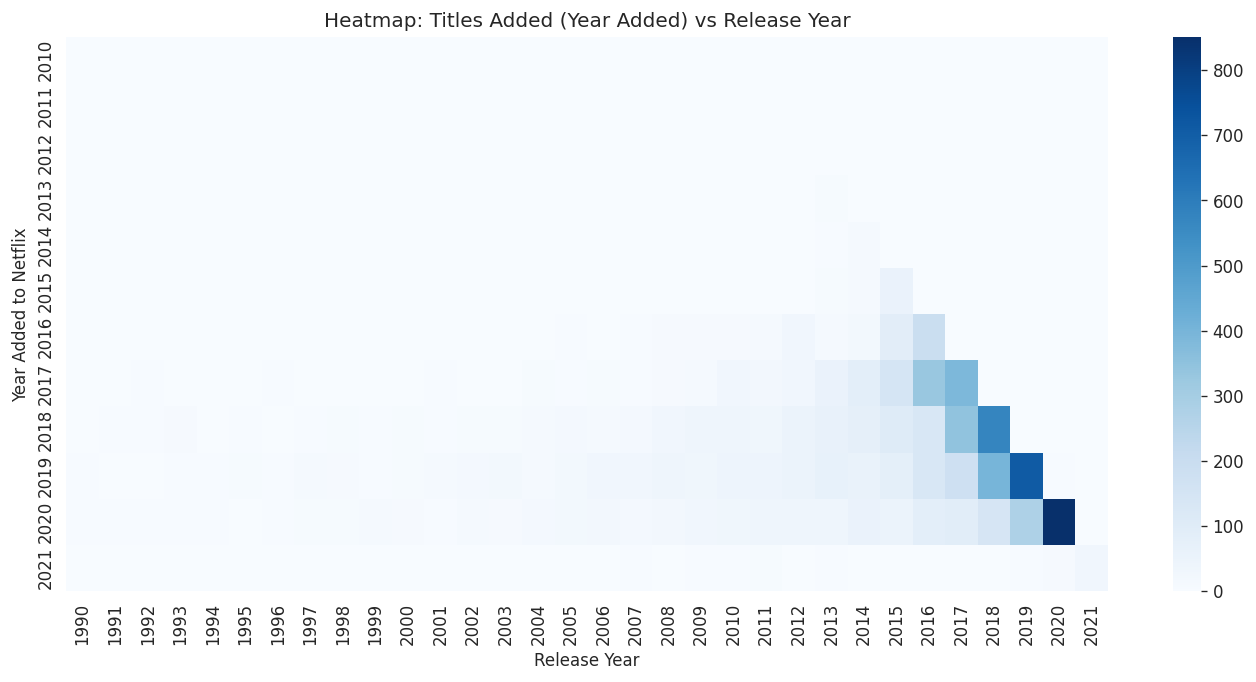

In [44]:
df2 = netflix_df.dropna(subset=['year_added', 'release_year']).copy()
df2['year_added'] = df2['year_added'].astype(int)

# Count how many titles of each release_year were added in each year_added
matrix = (df2.groupby(['year_added', 'release_year'])
            .size()
            .unstack(fill_value=0))

# Keep a sensible window (optional) to avoid huge heatmap
matrix = matrix.loc[matrix.index >= 2010, matrix.columns >= 1990]

plt.figure(figsize=(14,6))
sns.heatmap(matrix, cmap="Blues")
plt.title("Heatmap: Titles Added (Year Added) vs Release Year")
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.show()


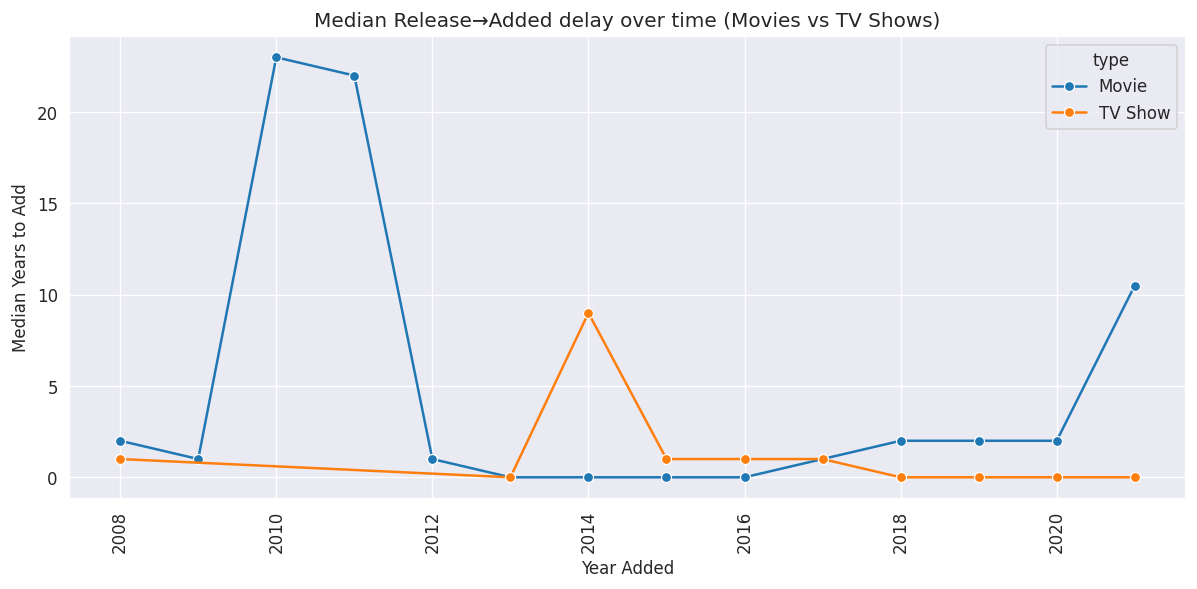

In [45]:
df3 = netflix_df.dropna(subset=['year_added','release_year','type']).copy()
df3['year_added'] = df3['year_added'].astype(int)
df3['years_to_add'] = df3['year_added'] - df3['release_year']

plt.figure(figsize=(12,5))
sns.lineplot(
    data=df3.groupby(['year_added','type'])['years_to_add'].median().reset_index(),
    x='year_added', y='years_to_add', hue='type', marker='o'
)
plt.title("Median Release→Added delay over time (Movies vs TV Shows)")
plt.xlabel("Year Added")
plt.ylabel("Median Years to Add")
plt.xticks(rotation=90)
plt.show()


In [46]:
#Q4 - What are the most common word pairs or phrases in content descriptions?
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# 1) Clean / prepare text
desc = netflix_df['description'].fillna("").astype(str)

# 2) BIGRAMS (word pairs)
bigram_vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(2, 2),   # (2,2) = bigrams
    min_df=5              # ignore very rare pairs (tune: 2, 3, 5, 10...)
)

X_bi = bigram_vectorizer.fit_transform(desc)
bigram_counts = X_bi.sum(axis=0).A1
bigram_vocab = bigram_vectorizer.get_feature_names_out()

top_n = 25
top_bigrams = (
    pd.DataFrame({"bigram": bigram_vocab, "count": bigram_counts})
      .sort_values("count", ascending=False)
      .head(top_n)
      .reset_index(drop=True)
)

top_bigrams


,bigram,count
0,high school,133
1,year old,130
2,young man,103
3,young woman,98
4,new york,86
5,small town,59
6,best friend,51
7,true story,48
8,stand special,47
9,world war,46


In [47]:
# 3) TRIGRAMS (3-word phrases)
trigram_vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(3, 3),   # (3,3) = trigrams
    min_df=3
)

X_tri = trigram_vectorizer.fit_transform(desc)
trigram_counts = X_tri.sum(axis=0).A1
trigram_vocab = trigram_vectorizer.get_feature_names_out()

top_trigrams = (
    pd.DataFrame({"trigram": trigram_vocab, "count": trigram_counts})
      .sort_values("count", ascending=False)
      .head(25)
      .reset_index(drop=True)
)

top_trigrams


,trigram,count
0,world war ii,38
1,new york city,35
2,based true story,25
3,based true events,16
4,11 year old,13
5,10 year old,12
6,year old girl,10
7,inspired true events,8
8,17 year old,8
9,dreams come true,8


director
Unknown                2376
Jan Suter                21
Raúl Campos              19
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Youssef Chahine          12
Martin Scorsese          12
Jay Chapman              12
Steven Spielberg         10
Anurag Kashyap            9
David Dhawan              9
Shannon Hartman           9
Johnnie To                8
Hakan Algül               8
Name: count, dtype: int64


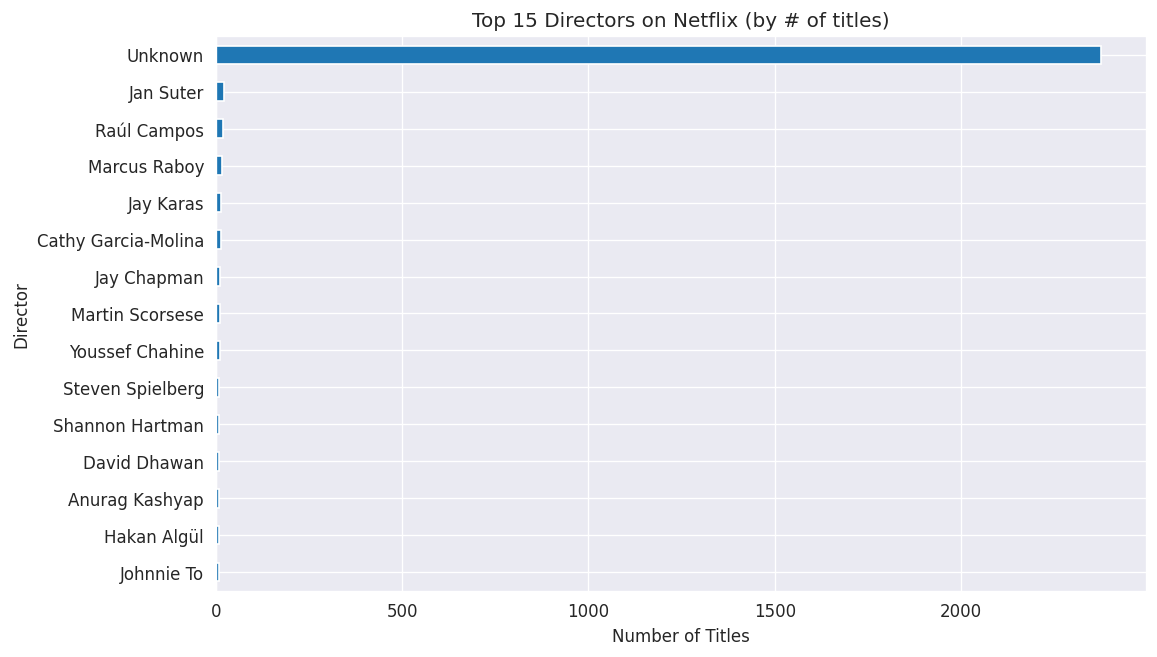

In [48]:
#Q5- Who are the top directors on Netflix?
# Top directors on Netflix (by number of titles in this dataset)

top_n = 15  # change as you like

top_directors = (
    netflix_df['director']
    .dropna()                                 # remove NaN directors
    .str.split(',')                           # split multiple directors
    .explode()                                # one director per row
    .str.strip()                              # remove extra spaces
    .value_counts()
    .head(top_n)
)

print(top_directors)

# Optional: plot
plt.figure(figsize=(10, 6))
top_directors.sort_values().plot(kind='barh')
plt.title(f"Top {top_n} Directors on Netflix (by # of titles)")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


In [49]:
def top_directors_by_type(df, content_type, top_n=10):
    s = (df[df['type'] == content_type]['director']
         .dropna().str.split(',').explode().str.strip()
         .value_counts().head(top_n))
    return s

print("Top Movie Directors:\n", top_directors_by_type(netflix_df, "Movie", 10), "\n")
print("Top TV Show Directors:\n", top_directors_by_type(netflix_df, "TV Show", 10))


Top Movie Directors:
 director
Unknown                162
Jan Suter               21
Raúl Campos             19
Jay Karas               15
Marcus Raboy            15
Cathy Garcia-Molina     13
Youssef Chahine         12
Martin Scorsese         12
Jay Chapman             12
Steven Spielberg        10
Name: count, dtype: int64 

Top TV Show Directors:
 director
Unknown                2214
Ken Burns                 3
Alastair Fothergill       3
Jung-ah Im                2
Rob Seidenglanz           2
Stan Lathan               2
Lynn Novick               2
Shin Won-ho               2
Iginio Straffi            2
Steven Bognar             1
Name: count, dtype: int64
